**Import Libraries**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.mixture import GaussianMixture

**Load Dataset**

In [ ]:
cd = pd.read_csv(r"/content/customer_dataset.csv")
cd.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [ ]:
cd.shape

(99, 13)

In [ ]:
cd.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

**Data Type**

In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [ ]:
cd.isnull().sum()

,0
Age,0
Profession,0
Marrital Status,0
Education,0
No of Dependents,0
Personal loan,0
House Loan,0
Wife Working,0
Salary,0
Wife Salary,0


**Descriptive Statistics**

In [ ]:
cd.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


**Segmentation **

In [ ]:
cd['Salary_Range'] = pd.cut(cd['Salary'],
                                     bins=[0, 500000, 1000000, 2000000, 3000000],
                                     labels=['<5 Lakhs', '5-10 Lakhs', '10-20 Lakhs', '>20 Lakhs'])


customer_segments = cd.groupby(['Age', 'Profession', 'Salary_Range'])['Make'].count().reset_index(name='Count')


customer_segments.head(10)

<ipython-input-16-e828ce1b28ee>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_segments = cd.groupby(['Age', 'Profession', 'Salary_Range'])['Make'].count().reset_index(name='Count')


,Age,Profession,Salary_Range,Count
0,26,Business,<5 Lakhs,0
1,26,Business,5-10 Lakhs,0
2,26,Business,10-20 Lakhs,0
3,26,Business,>20 Lakhs,0
4,26,Salaried,<5 Lakhs,0
5,26,Salaried,5-10 Lakhs,1
6,26,Salaried,10-20 Lakhs,0
7,26,Salaried,>20 Lakhs,0
8,27,Business,<5 Lakhs,0
9,27,Business,5-10 Lakhs,0


In [ ]:
sorted_segments = customer_segments.sort_values(by='Count', ascending=False)
sorted_segments.head(10)


,Age,Profession,Salary_Range,Count
78,35,Salaried,10-20 Lakhs,8
82,36,Business,10-20 Lakhs,6
46,31,Salaried,10-20 Lakhs,5
119,42,Salaried,>20 Lakhs,4
13,27,Salaried,5-10 Lakhs,3
94,37,Salaried,10-20 Lakhs,3
86,36,Salaried,10-20 Lakhs,3
70,34,Salaried,10-20 Lakhs,3
29,29,Salaried,5-10 Lakhs,2
34,30,Business,10-20 Lakhs,2


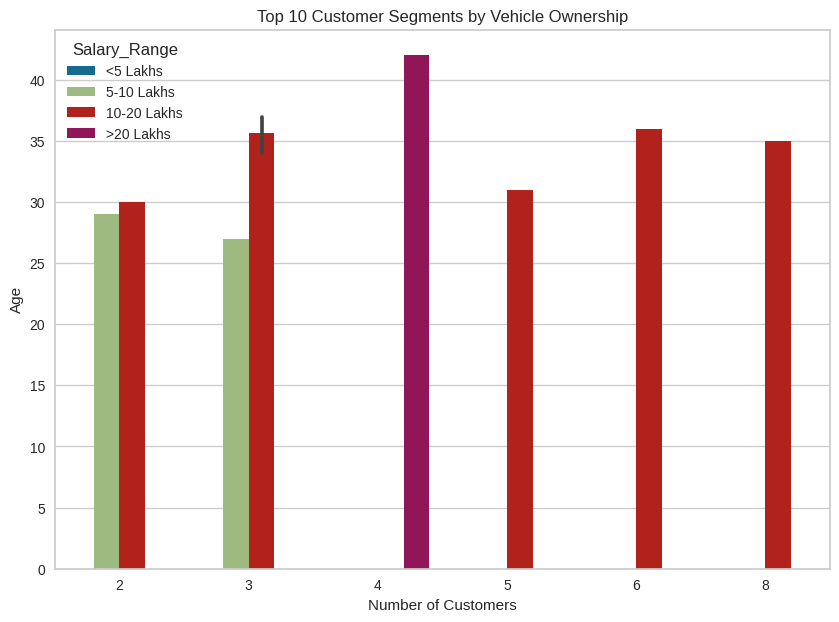

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data=sorted_segments.head(10), x='Count', y='Age', hue='Salary_Range')
plt.title('Top 10 Customer Segments by Vehicle Ownership')
plt.xlabel('Number of Customers')
plt.ylabel('Age')
plt.show()

In [ ]:
vehicle_ownership = cd.groupby(['Age', 'Profession', 'Salary_Range', 'Make']).size().reset_index(name='Ownership_Count')
vehicle_ownership.sort_values(by='Ownership_Count', ascending=False).head(10)

<ipython-input-24-7ba09ec49da0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_ownership = cd.groupby(['Age', 'Profession', 'Salary_Range', 'Make']).size().reset_index(name='Ownership_Count')


,Age,Profession,Salary_Range,Make,Ownership_Count
708,35,Salaried,10-20 Lakhs,SUV,3
345,30,Salaried,10-20 Lakhs,Creata,2
702,35,Salaried,10-20 Lakhs,Baleno,2
703,35,Salaried,10-20 Lakhs,Ciaz,2
642,34,Salaried,>20 Lakhs,Creata,2
117,27,Salaried,5-10 Lakhs,Baleno,2
189,28,Salaried,5-10 Lakhs,Baleno,2
638,34,Salaried,10-20 Lakhs,i20,2
786,36,Salaried,>20 Lakhs,Creata,2
415,31,Salaried,10-20 Lakhs,Ciaz,2


In [ ]:
age_vehicle = cd.groupby(['Age', 'Make']).size().reset_index(name='Ownership_Count')
age_vehicle = age_vehicle.sort_values(by='Ownership_Count', ascending=False)
age_vehicle.head(10)


,Age,Make,Ownership_Count
36,36,SUV,4
28,35,Baleno,3
30,35,SUV,3
1,27,Baleno,3
38,36,i20,3
14,31,Baleno,2
29,35,Ciaz,2
24,34,Creata,2
31,35,i20,2
50,41,Creata,2


In [ ]:
income_vehicle = cd.groupby(['Salary_Range', 'Make']).size().reset_index(name='Ownership_Count')
income_vehicle = income_vehicle.sort_values(by='Ownership_Count', ascending=False)
income_vehicle.head(10)


<ipython-input-26-e65dda417b5e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_vehicle = cd.groupby(['Salary_Range', 'Make']).size().reset_index(name='Ownership_Count')


,Salary_Range,Make,Ownership_Count
18,10-20 Lakhs,Baleno,11
24,10-20 Lakhs,SUV,11
26,10-20 Lakhs,i20,9
30,>20 Lakhs,Creata,7
20,10-20 Lakhs,City,7
9,5-10 Lakhs,Baleno,7
19,10-20 Lakhs,Ciaz,6
22,10-20 Lakhs,Duster,6
28,>20 Lakhs,Ciaz,5
21,10-20 Lakhs,Creata,5


In [ ]:
brand_preference = cd.groupby(['Make', 'Salary_Range']).size().reset_index(name='Ownership_Count')
brand_preference = brand_preference.sort_values(by='Ownership_Count', ascending=False)
brand_preference.head(10)


<ipython-input-27-f0e05a612335>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_preference = cd.groupby(['Make', 'Salary_Range']).size().reset_index(name='Ownership_Count')


,Make,Salary_Range,Ownership_Count
2,Baleno,10-20 Lakhs,11
26,SUV,10-20 Lakhs,11
34,i20,10-20 Lakhs,9
15,Creata,>20 Lakhs,7
1,Baleno,5-10 Lakhs,7
10,City,10-20 Lakhs,7
18,Duster,10-20 Lakhs,6
6,Ciaz,10-20 Lakhs,6
7,Ciaz,>20 Lakhs,5
27,SUV,>20 Lakhs,5


**EDA**

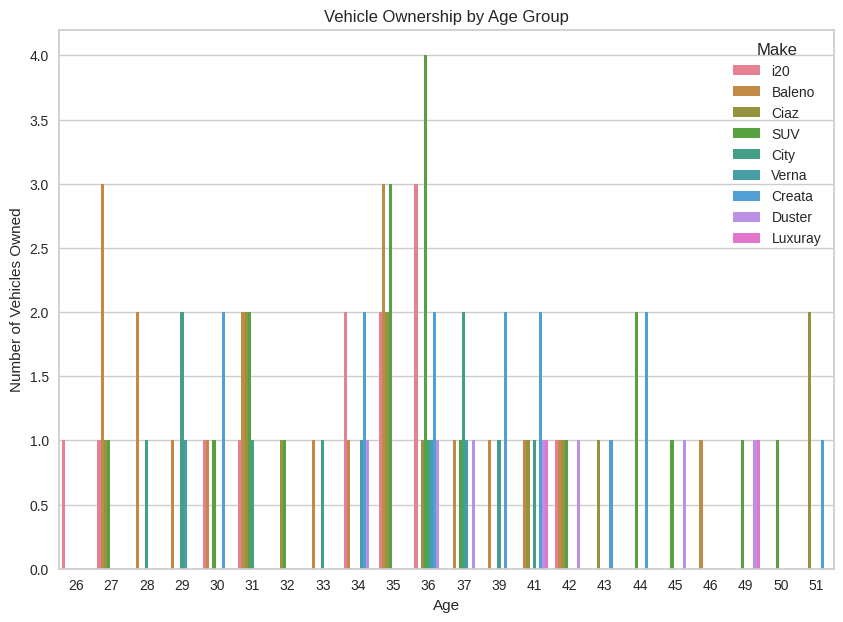

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=cd, x='Age', hue='Make')
plt.title('Vehicle Ownership by Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Vehicles Owned')
plt.show()

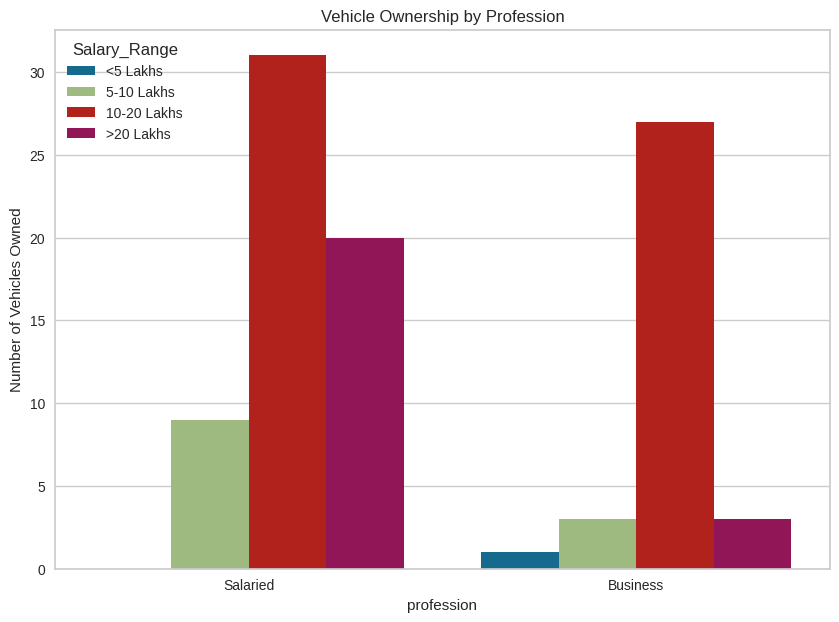

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=cd, x='Profession', hue='Salary_Range')
plt.title('Vehicle Ownership by Profession')
plt.xlabel('profession')
plt.ylabel('Number of Vehicles Owned')
plt.show()

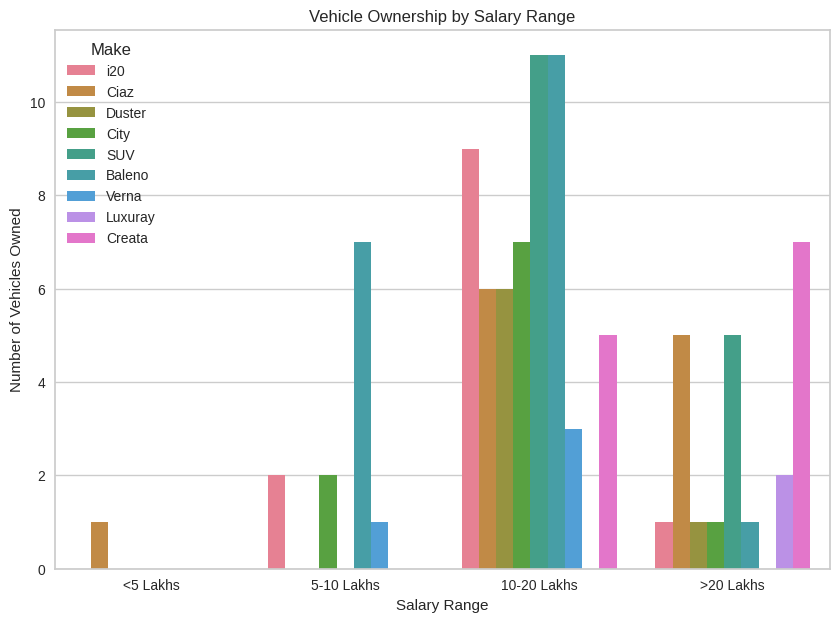

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=cd, x='Salary_Range', hue='Make')
plt.title('Vehicle Ownership by Salary Range')
plt.xlabel('Salary Range')
plt.ylabel('Number of Vehicles Owned')
plt.show()

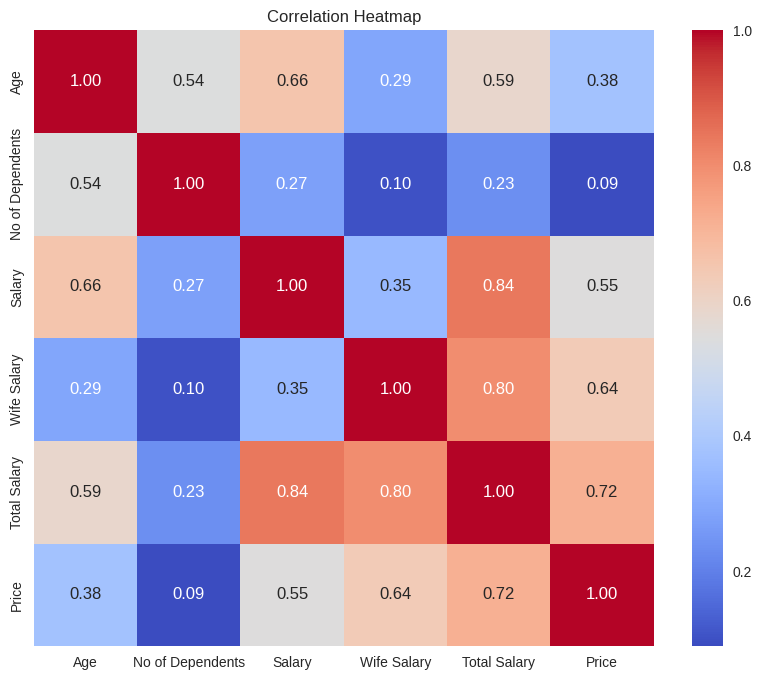

In [ ]:
cdn = cd.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = cdn.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

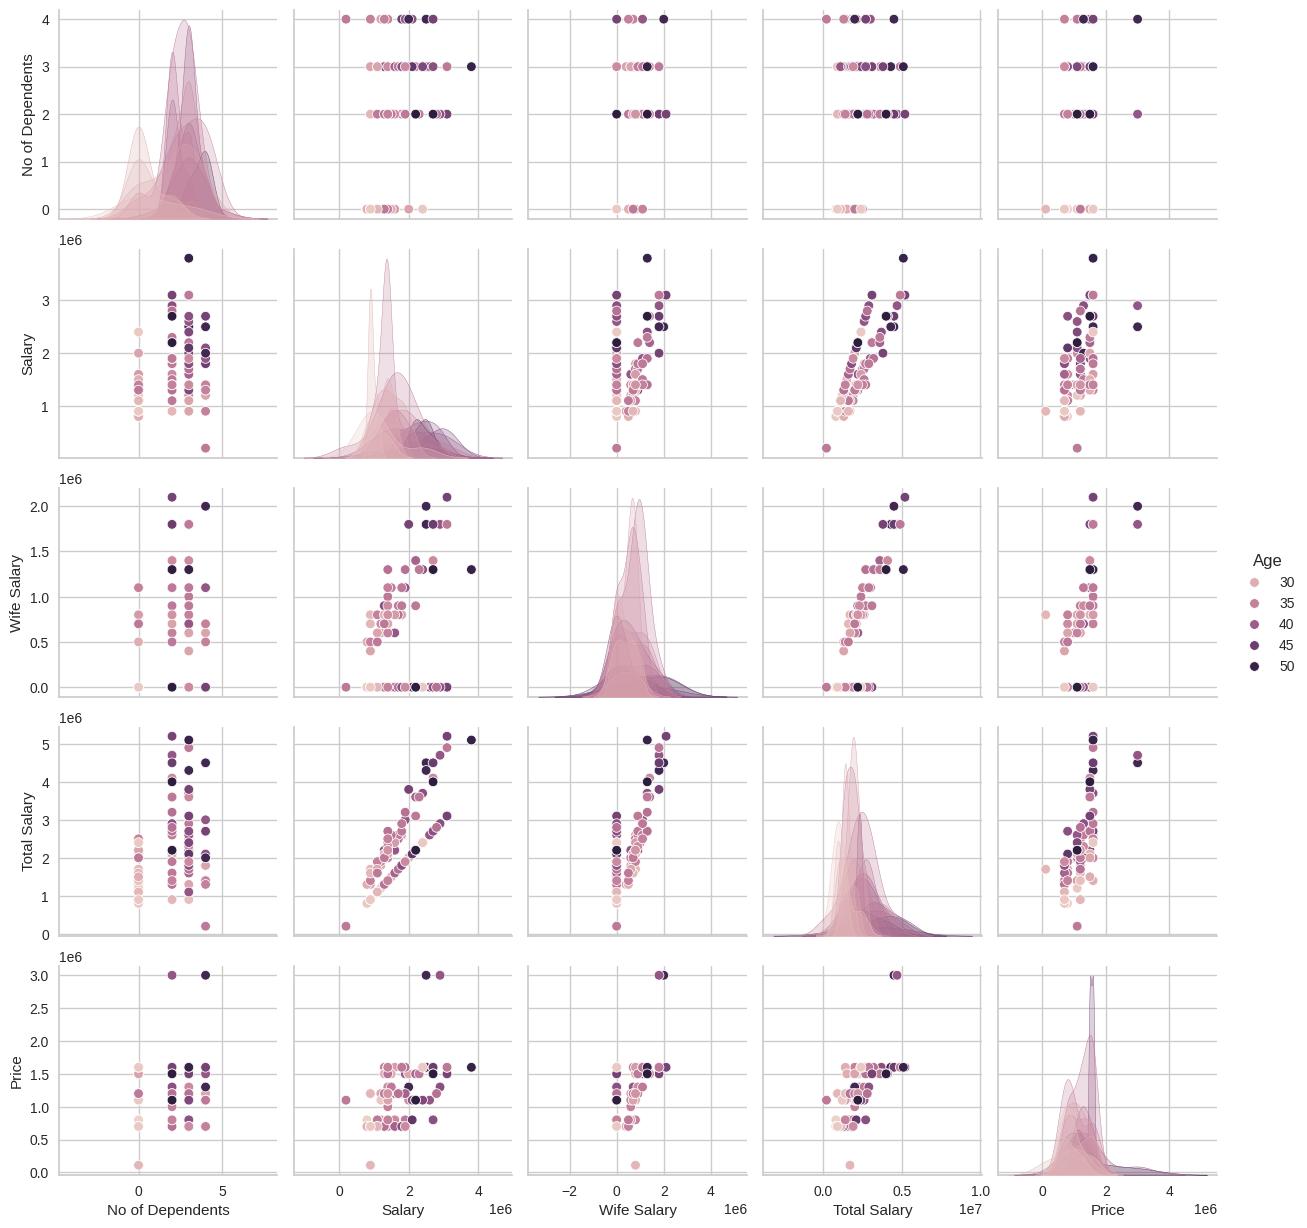

In [ ]:
sns.pairplot(cd, hue = 'Age')

([0, 1], [Text(0, 0, 'Post Graduate'), Text(1, 0, 'Graduate')])

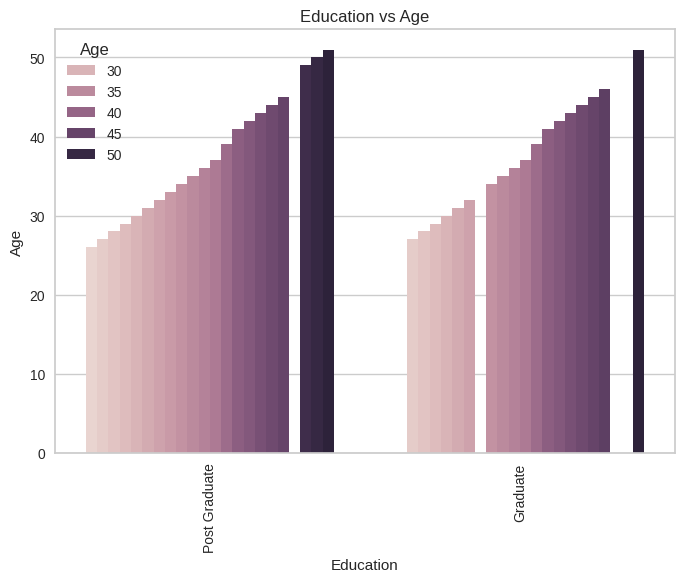

In [ ]:
sns.barplot( x = 'Education', y = 'Age', hue = 'Age',data = cd)
plt.title('Education vs Age')
plt.xticks(rotation = 90)

<Axes: xlabel='Profession', ylabel='count'>

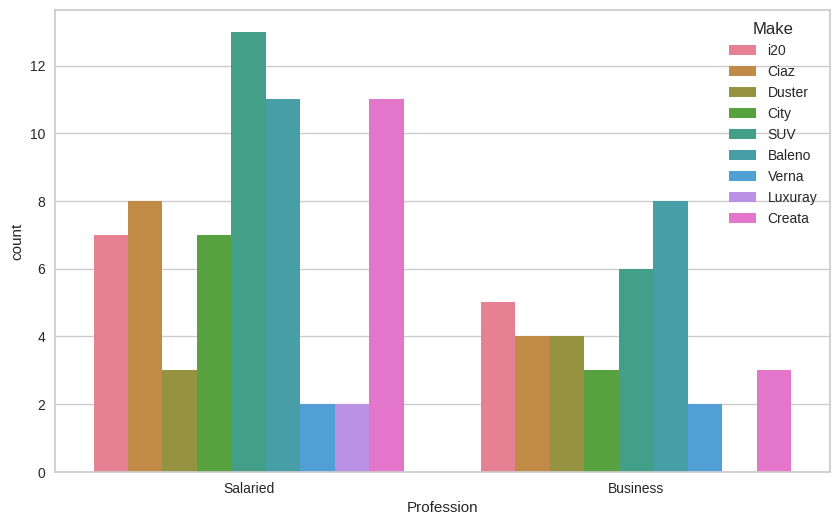

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Profession', data = cd, hue = 'Make' )

Text(0.5, 1.0, 'No. of cars per PlugType')

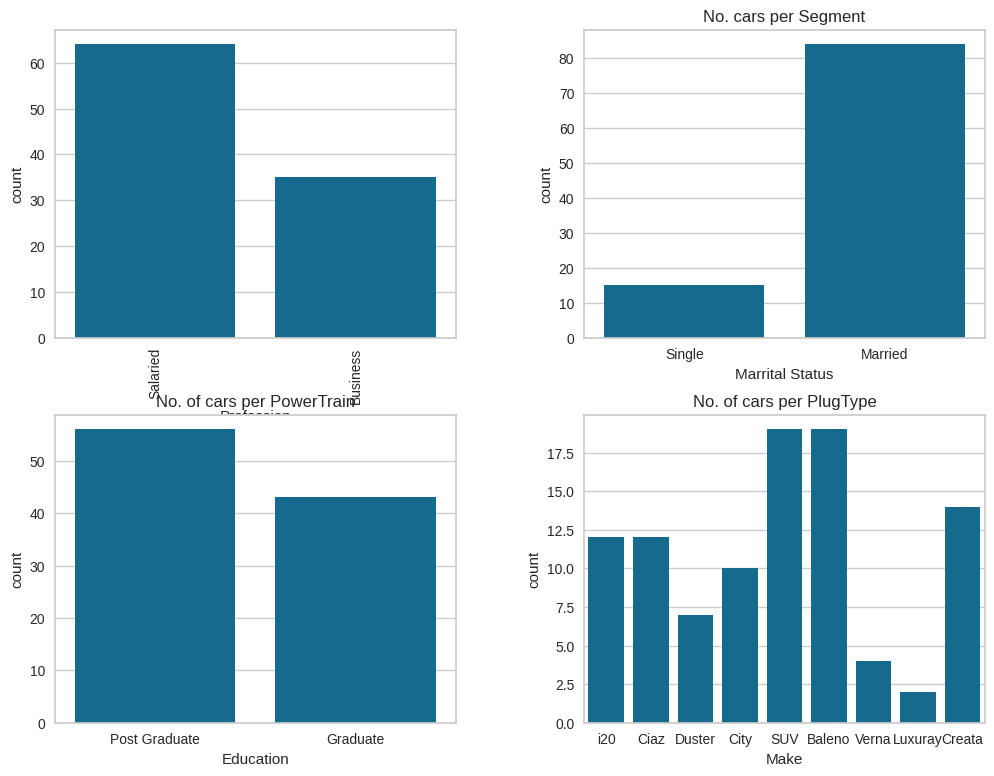

In [ ]:
plt.figure(1, figsize = (12,9))
plt.subplots_adjust(wspace = 0.32, hspace = 0.25)

plt.subplot(221)
sns.countplot(data=cd, x ='Profession')
plt.title("Number of customers by Profession")
plt.xticks(rotation = 90)

plt.subplot(222)
sns.countplot(data = cd, x = 'Marrital Status')
plt.title("No. customer by marrital status")

plt.subplot(223)
sns.countplot(data = cd, x = 'Education' )
plt.title("No. of customer by education")

plt.subplot(224)
sns.countplot(data = cd, x = 'Make')
plt.title("No. of customer by ")

<Axes: title={'center': 'Total Salary of customer'}, xlabel='No. of samples'>

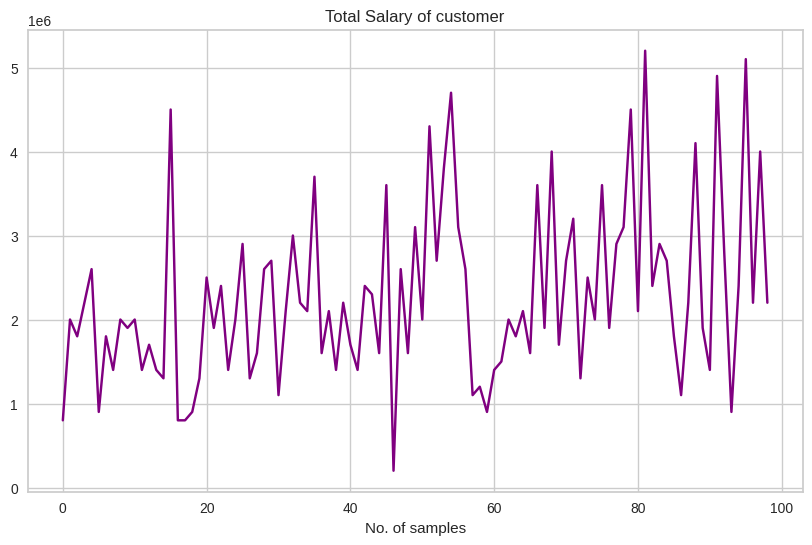

In [48]:
cd['Total Salary'].plot(figsize = (10, 6), title = 'Total Salary of customer', xlabel = 'No. of samples', color = 'Purple')

<ipython-input-53-4c32e3ddc4b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Make',y ='No of Dependents',data = cd,palette ='Paired')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'i20'),
  Text(1, 0, 'Ciaz'),
  Text(2, 0, 'Duster'),
  Text(3, 0, 'City'),
  Text(4, 0, 'SUV'),
  Text(5, 0, 'Baleno'),
  Text(6, 0, 'Verna'),
  Text(7, 0, 'Luxuray'),
  Text(8, 0, 'Creata')])

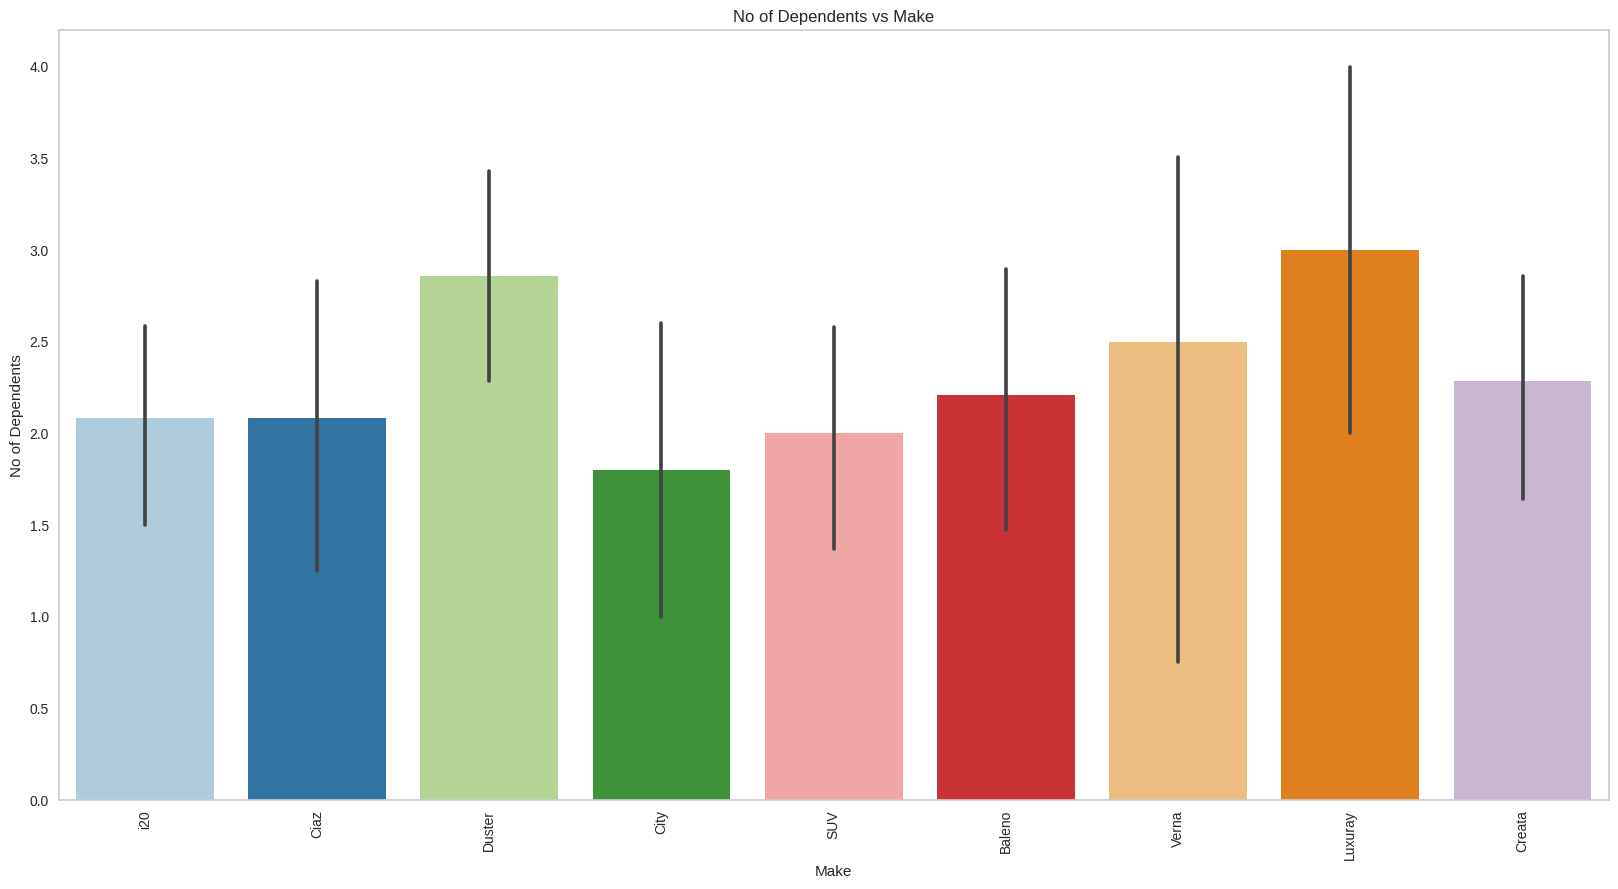

In [53]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Make',y ='No of Dependents',data = cd,palette ='Paired')
plt.grid(axis ='y')
plt.title('No of Dependents vs Make')
plt.xlabel('Make')
plt.ylabel('No of Dependents')
plt.xticks(rotation = 90)

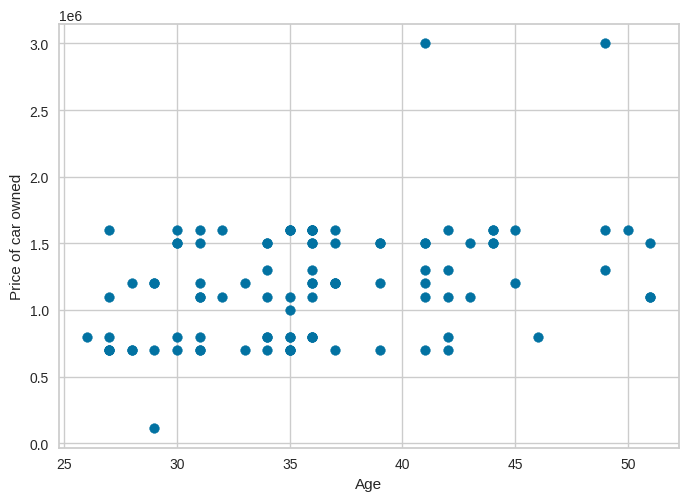

In [67]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(cd['Age'],cd['Price'])
plt.show()


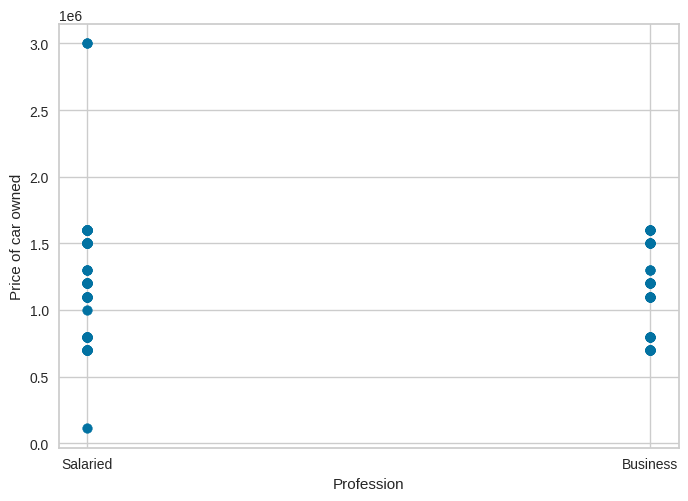

In [68]:
plt.scatter(cd['Profession'],cd['Price'])
plt.xlabel('Profession')
plt.ylabel('Price of car owned')
plt.show()